# <center> Plots for journal </center>

In [2]:
import util
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update({'font.size': 14})
mpl.rc('text', usetex = False)
mpl.rc('font', family = 'serif')

In [3]:
out = "../PsiResults/ComparePsis/Plots_journal/"
name = "wcano"

## Lists comparison

Load dataframes.

In [3]:
df_oursin = pd.read_csv("../PsiResults/ComparePsis/wcano_compare_emul_oursin_top335emulUsers/compare_lists_df.txt")
df_cascade = pd.read_csv("../PsiResults/ComparePsis/wcano_compare_emul_cascade_top335emulUsers/compare_lists_df.txt")

In [4]:
df_oursin[:5]

,N,min_psi_emul,min_psi_model,kendall,mean_dist,common_users_prop
0,2,0.007922,0.010367,1.000000,1.000000,0.500000
1,3,0.006430,0.007884,1.000000,1.333333,0.333333
2,4,0.006418,0.006774,0.333333,1.250000,0.750000
3,5,0.006025,0.006212,0.000000,1.600000,1.000000
4,6,0.004151,0.004977,0.333333,1.500000,0.833333


In [5]:
df_cascade[:5]

,N,min_psi_emul,min_psi_model,kendall,mean_dist,common_users_prop
0,2,0.006430,0.003020,1.000000,137.000000,0.500000
1,3,0.006418,0.003011,0.333333,121.000000,0.333333
2,4,0.006025,0.002637,-0.333333,91.500000,0.500000
3,5,0.004151,0.002210,-0.200000,83.000000,0.400000
4,6,0.003748,0.001340,0.066667,112.333333,0.333333


Plot kendall tau

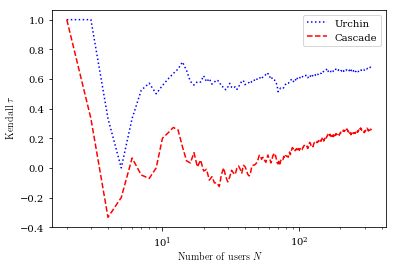

In [6]:
# init
fig, ax = plt.subplots()
x = df_oursin['N'].values

# plot kendall tau
ax.semilogx(x, df_oursin['kendall'].values, color='blue', ls=':', label="Urchin")
ax.semilogx(x, df_cascade['kendall'].values, color='red', ls='--', label="Cascade")

# labels & legend
plt.xlabel(r"Number of users $N$", usetex=True)
plt.ylabel(r"Kendall $\tau$", usetex=True)
plt.legend(loc='best')

# show save close
plt.show()
plt.savefig(out + name + "_kendall_tau.eps", usetex=True)
plt.close()

Plot common user prop

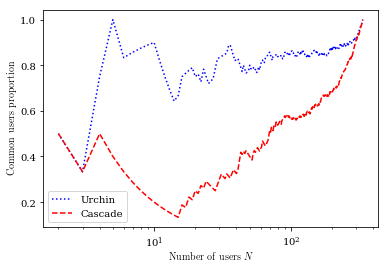

In [7]:
# init
fig, ax = plt.subplots()

# plot
ax.semilogx(x, df_oursin['common_users_prop'].values, color='blue', ls=':', label="Urchin")
ax.semilogx(x, df_cascade['common_users_prop'].values, color='red', ls='--', label="Cascade")
, usetex=True
# labels & legend
plt.xlabel(r"Number of users $N$", usetex=True)
plt.ylabel(r"Common users proportion", usetex=True)
plt.legend(loc='best')

# show save close
plt.show()
plt.savefig(out + name + "_common_user_prop.eps", usetex=True)
plt.close()

Plot mean dist

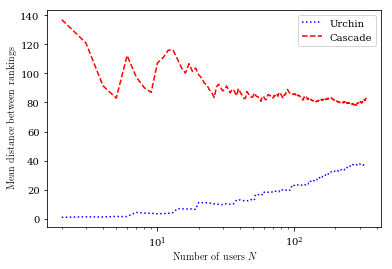

In [9]:
# init
fig, ax = plt.subplots()

# plot
ax.semilogx(x, df_oursin['mean_dist'].values, color='blue', ls=':', label="Urchin")
ax.semilogx(x, df_cascade['mean_dist'].values, color='red', ls='--', label="Cascade")

# labels & legend
plt.xlabel(r"Number of users $N$", usetex=True)
plt.ylabel(r"Mean distance between rankings", usetex=True)
plt.legend(loc='best')

# show save close
plt.show()
plt.savefig(out + name + "_mean_dist.eps", usetex=True)
plt.close()

## Influence direct comparison

Load influences into dicts.

In [4]:
Psi = {'emulator':dict(), 'urchin':dict(), 'cascade':dict()}

# emul
for line in open("../PsiResults/Psis/wcano_emul_top335.txt", "r"):
    line = line.split()
    user, psi = int(line[0]), float(line[1])
    if psi > 0:
        Psi['emulator'][user] = psi

# oursin
for line in open("../PsiResults/Psis/wcano_model_oursin.txt", "r"):
    line = line.split()
    user, psi = int(line[0]), float(line[1])
    if user in Psi['emulator']:
        Psi['urchin'][user] = psi

# cascade
for line in open("../PsiResults/Psis/wcano_model_cascade_top335emul.txt", "r"):
    line = line.split()
    user, psi = int(line[0]), float(line[1])
    Psi['cascade'][user] = psi

Plot psi cumulative distribution.

AttributeError: 'RendererPS' object has no attribute 'textcnt'

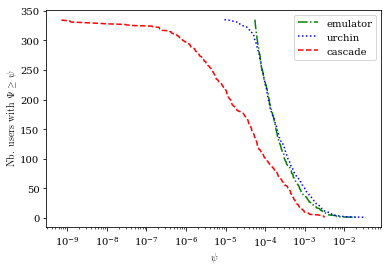

In [5]:
fig, ax = plt.subplots()
colors = {'urchin': 'blue', 'cascade':'red', 'emulator':'green'}
linestyle = {'urchin': ':', 'cascade':'--', 'emulator':'-.'}

for origin, psis in Psi.items():

    # on compte les occurences
    values = np.array(sorted(psis.values()))
    unique, counts = np.unique(values, return_counts=True)

    # on cumule
    cumul = np.flip(np.cumsum(np.flip(counts)))

    # plot
    ax.semilogx(unique, cumul, color=colors[origin], ls=linestyle[origin], label="{}".format(origin))

# labels and legend
plt.legend(loc='best')
plt.xlabel(r"$\psi$", usetex=True)
plt.ylabel(r"Nb. users with $\Psi \geq \psi$".format(origin), usetex=True)

# save & show
plt.savefig(out + name + "_psi_cumdistrib.eps", usetex=True)
plt.show()
plt.close()

In [29]:
del df_oursin, df_cascade

## Correlations - urchin

In [6]:
trace_path = "../Datasets/wcano_rtid.txt"
cascade = False
outfile = out + name + "_correlations.txt"

Get authors.

In [7]:
Author = util.get_authors(trace_path)

Get user graph.

In [9]:
LeadGraph, FollowGraph = util.graph_from_trace(trace_path, cascade, Author)
del LeadGraph

Get activity.

In [10]:
Lambda, Mu, total_time = util.get_activity(trace_path, cascade, Author, divide_by_time=True, retweeted=False)

Prepare for correlations.

In [12]:
outdegs = list()
lambdas = list()
mus = list()
psis_model = list()
psis_emul = list()

for u in Psi['urchin']:
    outdegs.append(len(FollowGraph[u]))
    lambdas.append(Lambda[u])
    mus.append(Mu[u])
    psis_model.append(Psi['urchin'][u])
    psis_emul.append(Psi['emulator'][u])

Compute correlations.

In [13]:
outdegs = np.array(outdegs).reshape(-1,1)
lambdas = np.array(lambdas).reshape(-1,1)
mus = np.array(mus).reshape(-1,1)
psis_model = np.array(psis_model).reshape(-1,1)
psis_emul = np.array(psis_emul).reshape(-1,1)

with open(outfile, 'a') as out:
    out.write("URCHIN\n")
    # outdeg
    corr = np.corrcoef(np.concatenate((outdegs, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between outdeg and psi_model : {}\n".format(corr))
    # lambda
    corr = np.corrcoef(np.concatenate((lambdas, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between lambda and psi_model : {}\n".format(corr))
    # mu
    corr = np.corrcoef(np.concatenate((mus, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between mu and psi_model : {}\n".format(corr))
    # psis
    corr = np.corrcoef(np.concatenate((psis_emul, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between psi_emul and psi_model : {}\n".format(corr))

## Correlations - cascade

In [14]:
cascade = True

Get user graph.

In [16]:
LeadGraph, FollowGraph = util.graph_from_trace(trace_path, cascade, Author)
del LeadGraph

Get activity.

In [18]:
Lambda, Mu, total_time = util.get_activity(trace_path, cascade, Author, divide_by_time=True, retweeted=False)

Prepare for correlations.

In [19]:
outdegs = list()
lambdas = list()
mus = list()
psis_model = list()
psis_emul = list()

for u in Psi['cascade']:
    outdegs.append(len(FollowGraph[u]))
    lambdas.append(Lambda[u])
    mus.append(Mu[u])
    psis_model.append(Psi['cascade'][u])
    psis_emul.append(Psi['emulator'][u])

Compute correlations.

In [20]:
outdegs = np.array(outdegs).reshape(-1,1)
lambdas = np.array(lambdas).reshape(-1,1)
mus = np.array(mus).reshape(-1,1)
psis_model = np.array(psis_model).reshape(-1,1)
psis_emul = np.array(psis_emul).reshape(-1,1)

with open(outfile, 'a') as out:
    out.write("\nCASCADE\n")
    # outdeg
    corr = np.corrcoef(np.concatenate((outdegs, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between outdeg and psi_model : {}\n".format(corr))
    # lambda
    corr = np.corrcoef(np.concatenate((lambdas, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between lambda and psi_model : {}\n".format(corr))
    # mu
    corr = np.corrcoef(np.concatenate((mus, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between mu and psi_model : {}\n".format(corr))
    # psis
    corr = np.corrcoef(np.concatenate((psis_emul, psis_model), axis=1), rowvar=False)[0,1]
    out.write("Correlation coeff between psi_emul and psi_model : {}\n".format(corr))

## MISC USELESS

OLD Plot.

D:\Anaconda\lib\site-packages\matplotlib\legend.py:508: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


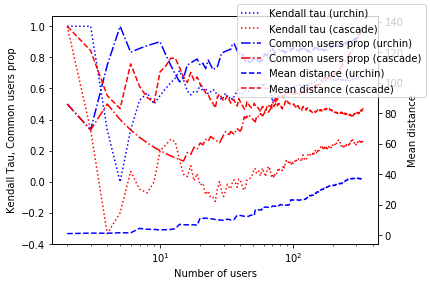

In [34]:
# init
fig, ax1 = plt.subplots()
x = df_oursin['N'].values

# plot kendall tau
ax1.semilogx(x, df_oursin['kendall'].values, color='blue', ls=':', label="Kendall tau (urchin)")
ax1.semilogx(x, df_cascade['kendall'].values, color='red', ls=':', label="Kendall tau (cascade)")

# plot common users prop
ax1.semilogx(x, df_oursin['common_users_prop'].values, color='blue', ls='-.', label="Common users prop (urchin)")
ax1.semilogx(x, df_cascade['common_users_prop'].values, color='red', ls='-.', label="Common users prop (cascade)")
ax1.set_xlabel("Number of users")
ax1.set_ylabel("Kendall Tau, Common users prop")

# plot mean distance
ax2 = ax1.twinx()
ax2.semilogx(x, df_oursin['mean_dist'].values, color='blue', ls='--', label="Mean distance (urchin)")
ax2.semilogx(x, df_cascade['mean_dist'].values, color='red', ls="--", label="Mean distance (cascade)")
ax2.set_ylabel("Mean distance")

fig.tight_layout()
fig.legend(loc='best')
plt.show()